In [3]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
DATASET1_PATH = Path(r"./home/thes1067/data/theta_dataset/theta_new_dir1_with_filenames.csv")
DATASET2_PATH = Path(r"./home/thes1067/data/theta_dataset/theta_new_dir2_with_filenames.csv")
DATASET3_PATH = Path(r"./home/thes1067/data/theta_dataset/theta_new_dir10_with_filenames.csv")

In [5]:
config = dict(
    epochs=1200,
    learning_rate=0.001,
    weight_decay=1e-5,
    dropout=0.05,
    scaling="StandardScaler",
    shuffle=True,
    loss="SmoothL1Loss",
    smooth_l1_loss_beta=1.0,
    optimizer="Adamax",
    learning_rate_scheduler=True,
    test_size=0.2,
    drop_last=False,
    nprocs_filter=False,
    split_seed=42,
    random_seed=1234,
    batch_size=2048,
    outliers=False,
    outliers_removal_method="IQR"
)

In [7]:
MODEL_FILENAME="SmoothL1Loss_fixed_Adamax_fewer_neurons_0.2_testSize_new_StandardScaler_2048_batch_0.05_dropout_pytorch_v1.12.tar" # Full model

MODEL_DIR = rf"/home/thes1067/models/blue_waters"
MODEL_PATH = Path(MODEL_DIR, MODEL_FILENAME)

In [8]:
MODEL_PATH.is_file()

True

# Prepare the data

## Load the data

In [9]:
df_theta_posix1 = pd.read_csv(DATASET1_PATH)

df_theta_posix1

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,POSIX_F_VARIANCE_RANK_BYTES,uid,start_time,end_time,nprocs,jobid,lib_ver,hints,bandwidth,file
0,117346,116200,0,110527,10602,123,1746,0,0,0,...,6.992009e+07,34769,2021-01-31 13:07:46,2021-01-31 13:19:57,60,494542,3.2.1,romio_no_indep_rw=true;cb_nodes=4,3.336731,/work/eo080593/data/theta_new/dir_1/31/rikkert...
1,35991,32185,0,4972087,1443483,1658488,4323,0,0,0,...,7.421609e+07,6221,2021-01-26 16:40:14,2021-01-26 17:40:45,256,493262,3.1.8,romio_no_indep_rw=true;cb_nodes=4,0.119570,/work/eo080593/data/theta_new/dir_1/26/knomura...
2,194,172,0,34,1500,6,54,0,0,0,...,8.965979e+08,33738,2021-01-18 08:40:36,2021-01-18 09:33:48,16,491617,3.2.1,romio_no_indep_rw=true;cb_nodes=4,3.195669,/work/eo080593/data/theta_new/dir_1/18/kblonda...
3,194,172,0,34,1500,6,54,0,0,0,...,8.965979e+08,33738,2021-01-17 22:16:01,2021-01-17 23:08:33,16,491469,3.2.1,romio_no_indep_rw=true;cb_nodes=4,0.288913,/work/eo080593/data/theta_new/dir_1/17/kblonda...
4,35985,32181,0,4967077,1443483,1650971,4321,0,0,0,...,0.000000e+00,6221,2021-01-24 14:35:00,2021-01-24 16:22:01,256,493265,3.1.8,romio_no_indep_rw=true;cb_nodes=4,15.646382,/work/eo080593/data/theta_new/dir_1/24/knomura...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20679,194,172,0,34,1499,6,54,0,0,0,...,8.965979e+08,33738,2021-01-17 22:23:25,2021-01-17 23:15:44,16,491469,3.2.1,romio_no_indep_rw=true;cb_nodes=4,6.097970,/work/eo080593/data/theta_new/dir_1/17/kblonda...
20680,7848124,7824434,0,195,3947942,47038,70532,0,0,0,...,0.000000e+00,34498,2021-01-18 23:26:15,2021-01-18 23:36:48,64,491834,3.1.8,romio_no_indep_rw=true;cb_nodes=4,2.618205,/work/eo080593/data/theta_new/dir_1/18/moberg_...
20681,7848124,7824434,0,195,3947971,47038,70532,0,0,0,...,0.000000e+00,34498,2021-01-18 22:46:45,2021-01-18 22:57:54,64,491835,3.1.8,romio_no_indep_rw=true;cb_nodes=4,2.823528,/work/eo080593/data/theta_new/dir_1/18/moberg_...
20682,668924,638444,0,612416,12246,462178,93396,0,0,0,...,6.994052e+13,35253,2021-01-22 03:44:25,2021-01-22 03:47:08,448,492695,3.2.1,romio_no_indep_rw=true;cb_nodes=4,9.709969,/work/eo080593/data/theta_new/dir_1/22/anirudd...


In [10]:
len(df_theta_posix1)

20684

In [11]:
df_theta_posix1["bandwidth"].describe()

count     20684.000000
mean        453.775647
std       11137.431138
min           0.000000
25%           0.789280
50%           3.778500
75%           7.980337
max      473358.778382
Name: bandwidth, dtype: float64

In [12]:
df_theta_posix2 = pd.read_csv(DATASET2_PATH)

df_theta_posix2

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,POSIX_F_VARIANCE_RANK_BYTES,uid,start_time,end_time,nprocs,jobid,lib_ver,hints,bandwidth,file
0,7838128,7815866,0,195,3924282,44202,66520,0,0,0,...,0.000000e+00,34498,2021-02-16 01:28:11,2021-02-16 01:33:28,64,498400,3.1.8,romio_no_indep_rw=true;cb_nodes=4,8.604421,/work/eo080593/data/theta_new/dir_2/16/moberg_...
1,47772,45612,0,44000,16027,32975,2297,32,0,0,...,1.764274e+06,35255,2021-02-19 05:21:05,2021-02-19 05:52:34,32,499258,3.2.1,romio_no_indep_rw=true;cb_nodes=4,16.202394,/work/eo080593/data/theta_new/dir_2/19/kwangna...
2,48028,45868,0,44000,16285,32975,2296,32,0,0,...,1.940407e+06,35255,2021-02-21 03:23:51,2021-02-21 03:56:57,32,499262,3.2.1,romio_no_indep_rw=true;cb_nodes=4,18.276472,/work/eo080593/data/theta_new/dir_2/21/kwangna...
3,47260,45100,0,44000,15551,32975,2295,32,0,0,...,1.943317e+06,35255,2021-02-19 05:21:27,2021-02-19 05:49:23,32,499258,3.2.1,romio_no_indep_rw=true;cb_nodes=4,17.999249,/work/eo080593/data/theta_new/dir_2/19/kwangna...
4,7838128,7815866,0,195,3924389,44202,66520,0,0,0,...,0.000000e+00,34498,2021-02-18 02:03:25,2021-02-18 02:08:52,64,498989,3.1.8,romio_no_indep_rw=true;cb_nodes=4,8.927686,/work/eo080593/data/theta_new/dir_2/18/moberg_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,625432,595852,0,626752,4831,456970,37114,0,0,0,...,7.647198e+03,35253,2021-02-28 05:39:44,2021-02-28 05:40:07,448,499439,3.2.1,romio_no_indep_rw=true;cb_nodes=4,12.765280,/work/eo080593/data/theta_new/dir_2/28/anirudd...
16031,122797,120310,0,107707,56290,444,4107,0,0,0,...,1.060933e+08,33874,2021-02-11 04:54:43,2021-02-11 05:10:20,60,497211,3.2.1,romio_no_indep_rw=true;cb_nodes=4,0.858720,/work/eo080593/data/theta_new/dir_2/11/rvirk_b...
16032,22,16,0,46,416,28,18,0,0,0,...,0.000000e+00,35255,2021-02-27 03:08:09,2021-02-27 03:08:17,1,500811,3.2.1,romio_no_indep_rw=true;cb_nodes=4,4.573180,/work/eo080593/data/theta_new/dir_2/27/kwangna...
16033,46684,44524,0,44000,14974,32975,2292,32,0,0,...,1.109183e+06,35255,2021-02-26 23:11:36,2021-02-26 23:33:36,32,500529,3.2.1,romio_no_indep_rw=true;cb_nodes=4,15.739149,/work/eo080593/data/theta_new/dir_2/26/kwangna...


In [13]:
len(df_theta_posix2)

16035

In [14]:
df_theta_posix2["bandwidth"].describe()

count     16035.000000
mean        416.822721
std        8443.704295
min           0.000000
25%           4.436293
50%           9.058484
75%          16.430413
max      430898.323543
Name: bandwidth, dtype: float64

In [15]:
df_theta_posix3 = pd.read_csv(DATASET3_PATH)

df_theta_posix3

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,POSIX_F_VARIANCE_RANK_BYTES,uid,start_time,end_time,nprocs,jobid,lib_ver,hints,bandwidth,file
0,3783,3783,0,0,0,0,6,-4,0,0,...,0.000000e+00,33051,2021-10-08 23:36:58,2021-10-08 23:39:57,128,556277,3.2.1,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/8/lward_n...
1,7563,7563,0,0,0,0,8,-4,0,0,...,0.000000e+00,33051,2021-10-18 08:45:07,2021-10-18 09:05:03,64,558010,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/18/lward_...
2,6135,4537,0,309693,12497,308966,8629,0,0,0,...,2.649293e+15,33444,2021-10-16 12:18:47,2021-10-16 12:20:33,64,557785,3.3.0,romio_no_indep_rw=true;cb_nodes=4,585.649393,/work/eo080593/data/theta_new/dir_10/16/climen...
3,0,-2,-2,0,0,0,1024,0,0,0,...,0.000000e+00,35670,2021-10-01 16:17:10,2021-10-01 19:16:20,512,553867,3.1.5,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/1/aah217_...
4,2117,2117,0,0,0,0,6,-4,0,0,...,0.000000e+00,33051,2021-10-18 09:19:21,2021-10-18 09:25:59,64,558010,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/18/lward_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,1473,1473,0,0,0,0,4,-4,0,0,...,0.000000e+00,33051,2021-10-21 11:07:17,2021-10-21 11:08:09,64,557843,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/21/lward_...
44909,1294,1294,0,0,0,0,0,-3,0,0,...,0.000000e+00,33051,2021-10-21 11:50:04,2021-10-21 11:50:05,64,557843,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/21/lward_...
44910,676,611,0,611,3111,4,28038,0,0,0,...,1.626482e+17,33581,2021-10-21 09:04:38,2021-10-21 11:27:53,64,558512,3.2.1,romio_no_indep_rw=true;cb_nodes=4,278.480866,/work/eo080593/data/theta_new/dir_10/21/cunzhi...
44911,68,-22,-22,7829,0,0,116,0,0,0,...,0.000000e+00,33738,2021-10-13 20:30:28,2021-10-13 21:42:11,16,557033,3.1.5,romio_no_indep_rw=true;cb_nodes=4,57.353379,/work/eo080593/data/theta_new/dir_10/13/kblond...


In [16]:
len(df_theta_posix3)

44913

In [17]:
df_theta_posix3["bandwidth"].describe()

count     44913.000000
mean       1223.362093
std        9614.214206
min           0.000000
25%           0.000000
50%           0.626431
75%         182.602483
max      555446.859131
Name: bandwidth, dtype: float64

In [18]:
df_theta_posix = pd.concat([df_theta_posix1, df_theta_posix2, df_theta_posix3], axis=0, ignore_index=True)
df_theta_posix

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,POSIX_F_VARIANCE_RANK_BYTES,uid,start_time,end_time,nprocs,jobid,lib_ver,hints,bandwidth,file
0,117346,116200,0,110527,10602,123,1746,0,0,0,...,6.992009e+07,34769,2021-01-31 13:07:46,2021-01-31 13:19:57,60,494542,3.2.1,romio_no_indep_rw=true;cb_nodes=4,3.336731,/work/eo080593/data/theta_new/dir_1/31/rikkert...
1,35991,32185,0,4972087,1443483,1658488,4323,0,0,0,...,7.421609e+07,6221,2021-01-26 16:40:14,2021-01-26 17:40:45,256,493262,3.1.8,romio_no_indep_rw=true;cb_nodes=4,0.119570,/work/eo080593/data/theta_new/dir_1/26/knomura...
2,194,172,0,34,1500,6,54,0,0,0,...,8.965979e+08,33738,2021-01-18 08:40:36,2021-01-18 09:33:48,16,491617,3.2.1,romio_no_indep_rw=true;cb_nodes=4,3.195669,/work/eo080593/data/theta_new/dir_1/18/kblonda...
3,194,172,0,34,1500,6,54,0,0,0,...,8.965979e+08,33738,2021-01-17 22:16:01,2021-01-17 23:08:33,16,491469,3.2.1,romio_no_indep_rw=true;cb_nodes=4,0.288913,/work/eo080593/data/theta_new/dir_1/17/kblonda...
4,35985,32181,0,4967077,1443483,1650971,4321,0,0,0,...,0.000000e+00,6221,2021-01-24 14:35:00,2021-01-24 16:22:01,256,493265,3.1.8,romio_no_indep_rw=true;cb_nodes=4,15.646382,/work/eo080593/data/theta_new/dir_1/24/knomura...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81627,1473,1473,0,0,0,0,4,-4,0,0,...,0.000000e+00,33051,2021-10-21 11:07:17,2021-10-21 11:08:09,64,557843,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/21/lward_...
81628,1294,1294,0,0,0,0,0,-3,0,0,...,0.000000e+00,33051,2021-10-21 11:50:04,2021-10-21 11:50:05,64,557843,3.3.0,romio_no_indep_rw=true;cb_nodes=4,0.000000,/work/eo080593/data/theta_new/dir_10/21/lward_...
81629,676,611,0,611,3111,4,28038,0,0,0,...,1.626482e+17,33581,2021-10-21 09:04:38,2021-10-21 11:27:53,64,558512,3.2.1,romio_no_indep_rw=true;cb_nodes=4,278.480866,/work/eo080593/data/theta_new/dir_10/21/cunzhi...
81630,68,-22,-22,7829,0,0,116,0,0,0,...,0.000000e+00,33738,2021-10-13 20:30:28,2021-10-13 21:42:11,16,557033,3.1.5,romio_no_indep_rw=true;cb_nodes=4,57.353379,/work/eo080593/data/theta_new/dir_10/13/kblond...


In [19]:
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 500)
max_bandwidth_outlier = df_theta_posix.loc[df_theta_posix["bandwidth"] == df_theta_posix["bandwidth"].max()]
max_bandwidth_outlier["file"]

76428    /work/eo080593/data/theta_new/dir_10/16/chrsshpr_qball_id556753_10-16-63096-8239998672018771388_1634430225_posix.csv
Name: file, dtype: object

In [20]:
df_theta_posix.loc[df_theta_posix["bandwidth"].nlargest(45).index, ["bandwidth", "file"]]

,bandwidth,file
76428,555446.859131,/work/eo080593/data/theta_new/dir_10/16/chrsshpr_qball_id556753_10-16-63096-8239998672018771388_1634430225_posix.csv
59138,506494.997389,/work/eo080593/data/theta_new/dir_10/10/chrsshpr_qball_id556215_10-10-7764-1230992372129114713_1633867012_posix.csv
12769,473358.778382,/work/eo080593/data/theta_new/dir_1/12/chrsshpr_qball_id482085_1-12-2952-1774169304042258186_1610446497_posix.csv
2785,442821.112020,/work/eo080593/data/theta_new/dir_1/13/chrsshpr_qball_id489747_1-13-4467-12615590717984198252_1610539655_posix.csv
36071,430898.323543,/work/eo080593/data/theta_new/dir_2/8/chrsshpr_qball_id496100_2-8-86190-17000339266149331964_1612859191_posix.csv
10652,427030.977483,/work/eo080593/data/theta_new/dir_1/25/chrsshpr_qball_id493586_1-25-51023-10422284683753077527_1611585400_posix.csv
55650,423777.064868,/work/eo080593/data/theta_new/dir_10/18/chrsshpr_qball_id556735_10-18-33877-11516372380179279781_9_posix.csv
36801,417051.650541,/work/eo080593/data/theta_new/dir_10/10/chrsshpr_qball_id556214_10-10-77445-16030807740957662729_9_posix.csv
69289,411670.563822,/work/eo080593/data/theta_new/dir_10/10/chrsshpr_qball_id556214_10-10-77444-17000339266149331964_9_posix.csv
8273,406937.509768,/work/eo080593/data/theta_new/dir_1/11/chrsshpr_qball_id490227_1-11-46451-10422284683753077527_1610370238_posix.csv


### Drop the irrelevant columns

In [21]:
df_theta_posix = df_theta_posix.drop(['uid', 'jobid', 'hints', 'start_time', 'end_time', 'lib_ver'],
                                     axis=1)

### Drop columns to match the Blue Waters dataset on which the model was trained

In [22]:
df_theta_posix = df_theta_posix.drop(['POSIX_FDSYNCS',
                                        'POSIX_RENAMED_FROM',
                                        'POSIX_F_VARIANCE_RANK_TIME',
                                        'POSIX_F_VARIANCE_RANK_BYTES'],
                                     axis=1)

### Remove the records with low bandwidth

In [23]:
df_theta_posix = df_theta_posix[df_theta_posix["bandwidth"] > config["lower_threshold_for_removal"]]

## Investigate the data

In [24]:
df_theta_posix["bandwidth"].describe()

count     25804.000000
mean       2747.059308
std       17319.079216
min          10.014714
25%          27.475321
50%         183.773864
75%         502.434530
max      555446.859131
Name: bandwidth, dtype: float64

In [25]:
df_theta_posix["nprocs"].unique()

array([  256,    60,    64,  1540,  3828,  1024,   512,     8,   128,
          40,  8192,     1,  4096,    32,     4,  2048,    12, 32768,
          96, 51328,  1152,   320,     7,  1280,   384, 16384,   768,
       12720, 65536,    16,   832,   896,   704, 81920, 32000,   192,
       13440,    61,  6816,  9280,  1604,   640,   576,   960,   448,
          15,     2,  1088,  1216, 24576,   496,    20, 40960,    30,
       12288,  1920,   150,   540,  2160,  1600,  4560,    62,    28,
       22400,  1536,    31,   168,   120, 49152,  2016,  8448])

<AxesSubplot: title={'center': 'Boxplot for bandwidth'}, xlabel='bandwidth'>

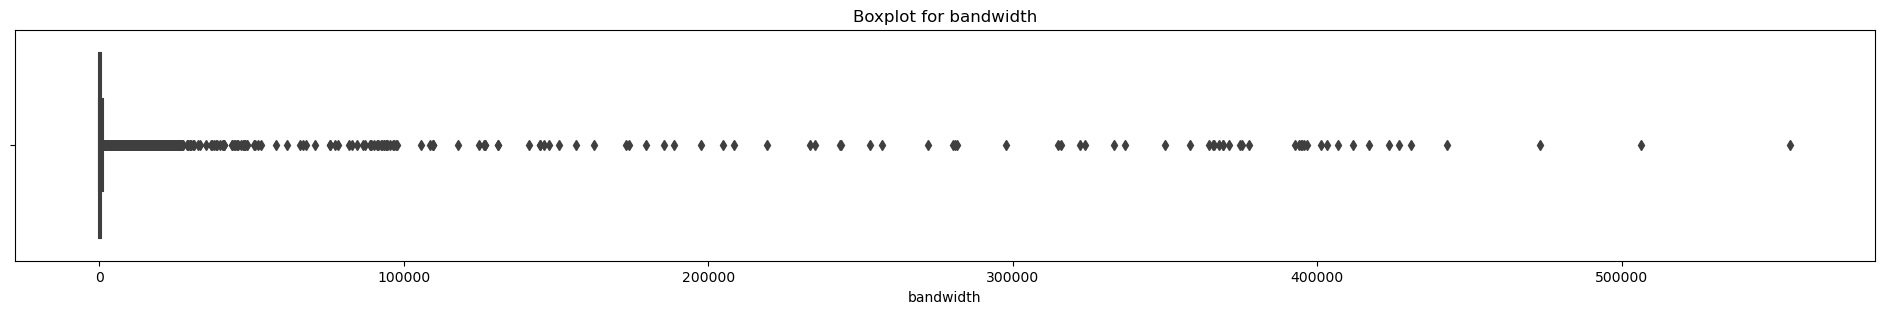

In [26]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Boxplot for bandwidth")
sns.boxplot(x=df_theta_posix.bandwidth)

In [29]:
df_theta_posix["nprocs"].value_counts()

64      7872
2       5224
32      4573
16      1993
60      1289
        ... 
1920       1
704        1
896        1
832        1
8448       1
Name: nprocs, Length: 71, dtype: int64

### A lot of outliers present

In [30]:
df_posix_negative_outliers = df_theta_posix.loc[(df_theta_posix.POSIX_F_FASTEST_RANK_TIME < 0) |
                                                          (df_theta_posix.POSIX_F_SLOWEST_RANK_TIME < 0) |
                                                          (df_theta_posix.POSIX_F_META_TIME < 0) |
                                                          (df_theta_posix.POSIX_TOTAL_TIME < 0) |
                                                          (df_theta_posix.bandwidth < 0)]
df_posix_negative_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth,file
7266,19773,18048,0,4404,22566,3158,3266,0,0,0,...,0.424144,245.034340,246.218432,1.726149,0.707728,-0.000088,0.251076,1540,16.947014,/work/eo080593/data/theta_new/dir_1/5/pmaris_xmfdn-menj-lobpcg_id488752_1-5-38731-3872888271442817778_1609843970_posix.csv
8579,19773,18048,0,4404,22563,3158,3266,0,0,0,...,0.422162,3.442933,13.590145,2.755791,1.052565,-0.000008,0.050056,1540,307.036235,/work/eo080593/data/theta_new/dir_1/3/pmaris_xmfdn-menj-lobpcg_id488751_1-3-1487-10422284683753077527_1609633941_posix.csv
9264,19773,18048,0,4404,22562,3158,3266,0,0,0,...,0.411435,24.377937,34.333850,3.653057,1.510593,-0.000053,0.029532,1540,121.532158,/work/eo080593/data/theta_new/dir_1/3/pmaris_xmfdn-menj-lobpcg_id488751_1-3-1027-10422284683753077527_1609633471_posix.csv
9691,19773,18048,0,4404,22551,3158,3321,0,0,0,...,0.356303,48.600988,51.719406,3.246617,2.841253,-0.000111,0.057004,1540,80.678923,/work/eo080593/data/theta_new/dir_1/3/pmaris_xmfdn-menj-lobpcg_id488751_1-3-2421-10422284683753077527_1609634852_posix.csv
10122,19773,18048,0,4404,22569,3158,3266,0,0,0,...,0.404809,309.006719,309.963899,0.273118,0.909360,-0.000030,0.419047,1540,13.461676,/work/eo080593/data/theta_new/dir_1/5/pmaris_xmfdn-menj-lobpcg_id488752_1-5-41019-3872888271442817778_1609846265_posix.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79765,6741,6132,0,1740,9274,1790,1106,0,0,0,...,0.139204,5.487118,6.589358,0.123763,0.320100,-0.000059,0.015166,496,357.555539,/work/eo080593/data/theta_new/dir_10/23/pmaris_xmfdn-menj-lobpcg_id559102_10-23-7326-11076186058226378120_1_posix.csv
80094,621,552,0,179,3220,198,98,0,0,0,...,0.012830,0.115324,1.532639,0.050881,0.011242,-0.000500,0.055507,28,24.378909,/work/eo080593/data/theta_new/dir_10/14/pmaris_xmfdn-menj-lobpcg_id557288_10-14-4051-9578554294911421599_1_posix.csv
81012,6741,6132,0,1740,9303,1790,1106,0,0,0,...,0.135098,2.126267,3.098632,0.116418,0.317314,-0.000018,0.012015,496,693.266753,/work/eo080593/data/theta_new/dir_10/22/pmaris_xmfdn-menj-lobpcg_id559035_10-22-64271-10422284683753077527_1_posix.csv
81375,621,552,0,179,3233,198,98,0,0,0,...,0.009930,2.633187,3.520562,0.064118,0.053429,-0.000101,0.127338,28,10.613235,/work/eo080593/data/theta_new/dir_10/15/pmaris_xmfdn-menj-lobpcg_id557544_10-15-43441-9578554294911421599_1_posix.csv


In [31]:
df_theta_posix_no_outliers = df_theta_posix.loc[(df_theta_posix.POSIX_F_FASTEST_RANK_TIME >= 0) &
                                                                    (df_theta_posix.POSIX_F_SLOWEST_RANK_TIME >= 0) &
                                                                    (df_theta_posix.POSIX_F_META_TIME >= 0) &
                                                                    (df_theta_posix.POSIX_TOTAL_TIME >= 0) &
                                                                    (df_theta_posix.bandwidth >= 0)]
df_theta_posix_no_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth,file
4,35985,32181,0,4967077,1443483,1650971,4321,0,0,0,...,2263.119365,0.480662,2264.531884,1.160359,9.577427,0.0,0.000000,256,15.646382,/work/eo080593/data/theta_new/dir_1/24/knomura_train.x-2.0.3-ifort_intelmpi_id493265_1-24-48900-3424791776538780234_2_posix.csv
6,117346,116200,0,110527,10044,123,1746,0,0,0,...,0.026694,7.644219,8.807971,0.068948,0.005140,0.0,0.153869,60,96.156311,/work/eo080593/data/theta_new/dir_1/23/rikkertj_brush.dna.geo.mpi_id493004_1-23-28772-8245696329547654180_1611389164_posix.csv
13,117346,116200,0,110527,10069,123,1746,0,0,0,...,0.027648,8.176662,9.929166,0.039592,0.006944,0.0,0.167628,60,85.298522,/work/eo080593/data/theta_new/dir_1/23/rikkertj_brush.dna.geo.mpi_id493031_1-23-31996-6019880231022810665_1611392405_posix.csv
16,2514,1719,0,1383,4589,1712,3056,0,0,0,...,3.770257,0.061917,7.955002,0.108779,0.062087,0.0,0.000000,64,547.261893,/work/eo080593/data/theta_new/dir_1/28/sarich_e3sm.exe_id494157_1-28-5672-5627409168087892475_1611797728_posix.csv
20,1423,1005,0,640,3726,799,1631,0,0,0,...,2.895008,0.122505,3.603841,0.093642,0.372459,0.0,0.000000,64,445.951504,/work/eo080593/data/theta_new/dir_1/16/climenrg_e3sm.exe_id491386_1-16-24009-13517322816805000194_1610779272_posix.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81619,436,371,0,371,3111,4,49573,0,0,0,...,0.000000,7.810021,18.704984,0.253244,0.013653,0.0,10.937777,64,165.854479,/work/eo080593/data/theta_new/dir_10/13/cunzhi_qb_id556679_10-13-13693-13667249579525508736_1634106386_posix.csv
81624,2339,1406,0,2236,10229,4513,6374,0,0,0,...,0.000000,8.587080,10.992587,0.143089,0.111062,0.0,0.481758,64,444.121404,/work/eo080593/data/theta_new/dir_10/23/climenrg_e3sm.exe_id559198_10-23-14116-5627409168087892475_1_posix.csv
81625,3680,2621,0,299864,14837,299003,7397,0,0,0,...,0.002974,1.748650,4.933029,0.366237,0.081158,0.0,4.510908,64,221.579739,/work/eo080593/data/theta_new/dir_10/30/climenrg_e3sm.exe_id560601_10-30-49482-1942573902196316808_1_posix.csv
81629,676,611,0,611,3111,4,28038,0,0,0,...,10.926309,0.216326,11.142636,0.078792,0.011018,0.0,10.929178,64,278.480866,/work/eo080593/data/theta_new/dir_10/21/cunzhi_qb_id558512_10-21-25478-17932892359854460779_1634808474_posix.csv


In [32]:
df_theta_posix_no_outliers["bandwidth"].describe()

count     25727.000000
mean       2754.724793
std       17344.409087
min          10.014714
25%          27.313814
50%         183.883078
75%         506.220778
max      555446.859131
Name: bandwidth, dtype: float64

<AxesSubplot: title={'center': 'Boxplot for bandwidth'}, xlabel='bandwidth'>

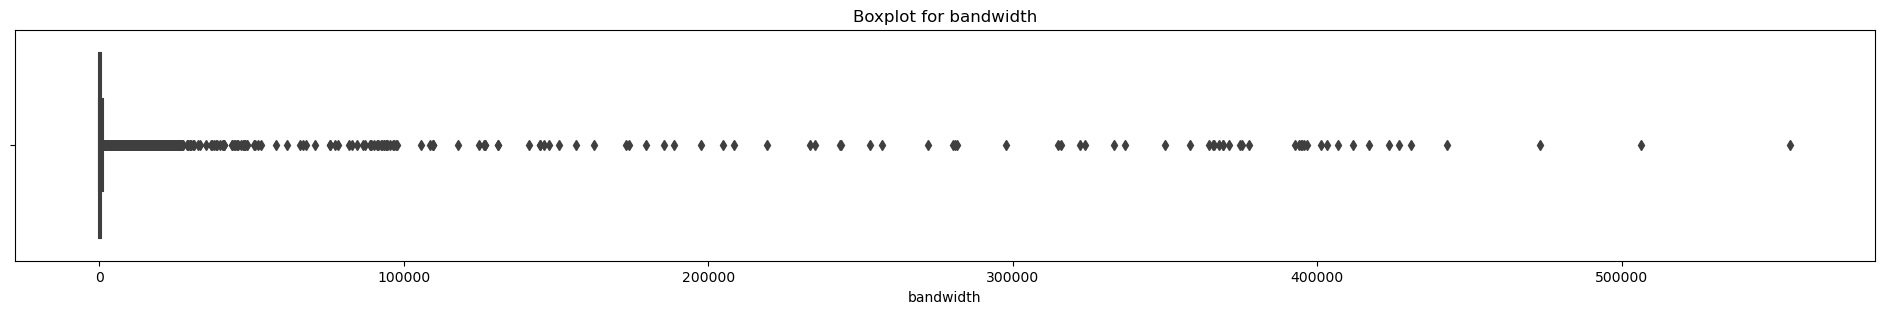

In [33]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Boxplot for bandwidth")
sns.boxplot(x=df_theta_posix_no_outliers.bandwidth)

In [36]:
if config["filter_zero_times"]:
    df_theta_posix = df_theta_posix_no_outliers

###  Filter out the outliers using IQR

In [37]:
bandwidth_q1 = df_theta_posix.bandwidth.quantile(0.25)
bandwidth_q3 = df_theta_posix.bandwidth.quantile(0.75)
bandwidth_iqr = bandwidth_q3 - bandwidth_q1
bandwidth_iqr

478.9069637830192

In [38]:
iqr_filter = (df_theta_posix.bandwidth >= bandwidth_q1 - 1.5 * bandwidth_iqr) & (df_theta_posix.bandwidth <= bandwidth_q3 + 1.5 * bandwidth_iqr)

bandwidth_outliers = df_theta_posix.loc[iqr_filter == False]
bandwidth_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth,file
168,6944,5950,0,172978,8612,0,994,-997,0,0,...,0.140475,0.444963,0.873827,0.235336,0.000124,0.000000,0.000000,512,1760.422121,/work/eo080593/data/theta_new/dir_1/6/kingg_a6sx.iia.x_id489366_1-6-40576-14330251293653819392_1609953484_posix.csv
281,2189,1348,0,24652,129667,48929,22196,0,0,0,...,9.347987,14.819787,28.136598,1.234559,0.640531,0.000396,14.907256,1,3469.131947,/work/eo080593/data/theta_new/dir_1/2/climenrg_e3sm.exe_id488666_1-2-28472-5627409168087892475_1609575004_posix.csv
342,1142428,1142428,0,203283,939145,0,779,97,0,0,...,1.932456,0.039676,2.392830,0.327219,0.432851,0.000000,0.000000,4096,40860.574281,/work/eo080593/data/theta_new/dir_1/15/yyf_qball_id490284_1-15-24022-10412015870975432975_1610703446_posix.csv
450,1061,698,0,3549,3443,3566,981,0,0,0,...,0.038826,0.121821,0.447933,0.021653,0.003801,0.000333,0.337825,1,2083.267530,/work/eo080593/data/theta_new/dir_1/28/sarich_e3sm.exe_id494183_1-28-8588-7982064178510924692_1611800594_posix.csv
753,6356,5446,0,172726,8008,0,910,-913,0,0,...,0.131827,0.160399,0.521161,0.176156,0.000103,0.000000,0.000000,512,2951.585972,/work/eo080593/data/theta_new/dir_1/8/kingg_a6sx.iia.x_id489625_1-8-66092-17248155629053419046_1610151796_posix.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81575,5115,2554,0,3622613,0,3577,10743,0,0,0,...,0.000000,1.790581,3.381075,1.377338,0.000000,0.000000,1.482280,2,1707.134545,/work/eo080593/data/theta_new/dir_10/3/mingge_joinwrf_id554876_10-3-54514-7455895643329420365_1633277757_posix.csv
81583,5115,2554,0,3622613,0,3577,10743,0,0,0,...,0.000000,0.172846,0.588745,0.245326,0.000000,0.000000,0.400041,2,10052.580955,/work/eo080593/data/theta_new/dir_10/4/mingge_joinwrf_id554915_10-4-4638-1048104889724243338_1633314464_posix.csv
81590,4691,2343,0,3025431,0,2942,9259,1,0,0,...,0.000000,0.081558,0.407825,0.079448,0.000000,0.000000,0.306987,2,21553.607608,/work/eo080593/data/theta_new/dir_10/3/mingge_joinwrf_id554910_10-3-84143-16788745587050489124_1633305293_posix.csv
81603,4691,2343,0,3025431,0,2942,9259,1,0,0,...,0.000000,0.027958,0.486247,0.138160,0.000000,0.000000,0.440256,2,19025.414994,/work/eo080593/data/theta_new/dir_10/3/mingge_joinwrf_id554910_10-3-84261-4533287815818543872_1633305419_posix.csv


In [39]:
bandwidth_outliers.loc[bandwidth_outliers["nprocs"] == bandwidth_outliers["nprocs"].max()].sort_values(by="nprocs", ascending=False)

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_WRITE_TIME,POSIX_F_META_TIME,POSIX_TOTAL_TIME,POSIX_F_MAX_READ_TIME,POSIX_F_MAX_WRITE_TIME,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,nprocs,bandwidth,file
3870,1148957,983078,0,991863,15758317,15212368,166906,0,0,0,...,13.161332,32.982579,48.975437,3.381947,11.340347,0.0,5.039267,81920,20234.572743,/work/eo080593/data/theta_new/dir_1/21/romanlee_osiris-2D.knl_id492181_1-21-36169-17000339266149331964_1611293654_posix.csv
4473,574500,491558,0,7,15696656,15212368,83970,0,0,0,...,11.717458,0.795309,12.566398,0.040097,4.282784,0.0,2.703981,81920,39469.806363,/work/eo080593/data/theta_new/dir_1/12/romanlee_osiris-2D.knl_id489659_1-12-2950-17000339266149331964_1610446793_posix.csv
4554,574500,491558,0,991863,55948,3,83969,0,0,0,...,0.000000,6.236008,6.316303,2.063660,0.078156,0.0,1.927633,81920,78422.178937,/work/eo080593/data/theta_new/dir_1/30/romanlee_osiris-2D.knl_id493804_1-30-26530-10422284683753077527_1611996614_posix.csv
7115,574500,491558,0,7,15211606,15212368,83970,0,0,0,...,2.336010,6.194663,8.530674,0.020098,4.086771,0.0,3.228785,81920,58043.720941,/work/eo080593/data/theta_new/dir_1/29/romanlee_osiris-2D.knl_id494128_1-29-53731-5351356878972850748_1611966381_posix.csv
8567,574500,491558,0,7,15501362,15212368,83970,0,0,0,...,16.339567,0.680084,17.019650,0.029128,3.981266,0.0,16.339626,81920,29111.402958,/work/eo080593/data/theta_new/dir_1/28/romanlee_osiris-2D.knl_id493802_1-28-21787-6253559328220643765_1611848076_posix.csv
16878,1061,38,0,7,32153906,3,2051,0,0,0,...,21.973013,1.439887,23.440598,0.019066,1.031757,0.0,0.000000,81920,2488.980408,/work/eo080593/data/theta_new/dir_1/28/romanlee_osiris-2D.knl_id493797_1-28-11450-1774169304042258186_1611833930_posix.csv
22795,574500,491558,0,991863,73573,3,83969,0,0,0,...,0.000000,1.977629,7.501574,3.299132,0.144657,0.0,3.199878,81920,66047.971367,/work/eo080593/data/theta_new/dir_2/15/romanlee_osiris-2D.knl_id497757_2-15-80883-1774169304042258186_1613435038_posix.csv
25130,574500,491558,0,7,15483860,15212368,83970,0,0,0,...,13.511481,0.679318,14.190798,0.013417,4.271659,0.0,13.511542,81920,34914.554569,/work/eo080593/data/theta_new/dir_2/15/romanlee_osiris-2D.knl_id497756_2-15-32856-17000339266149331964_1613414300_posix.csv


In [40]:
df_theta_posix_filtered_iqr = df_theta_posix.loc[iqr_filter == True]
df_theta_posix_filtered_iqr["bandwidth"].describe()

count    20916.000000
mean       177.703527
std        220.383655
min         10.014714
25%         17.774140
50%         84.779114
75%        254.357258
max       1223.868716
Name: bandwidth, dtype: float64

<AxesSubplot: title={'center': 'Bandwidth after IQR filtering'}, xlabel='bandwidth'>

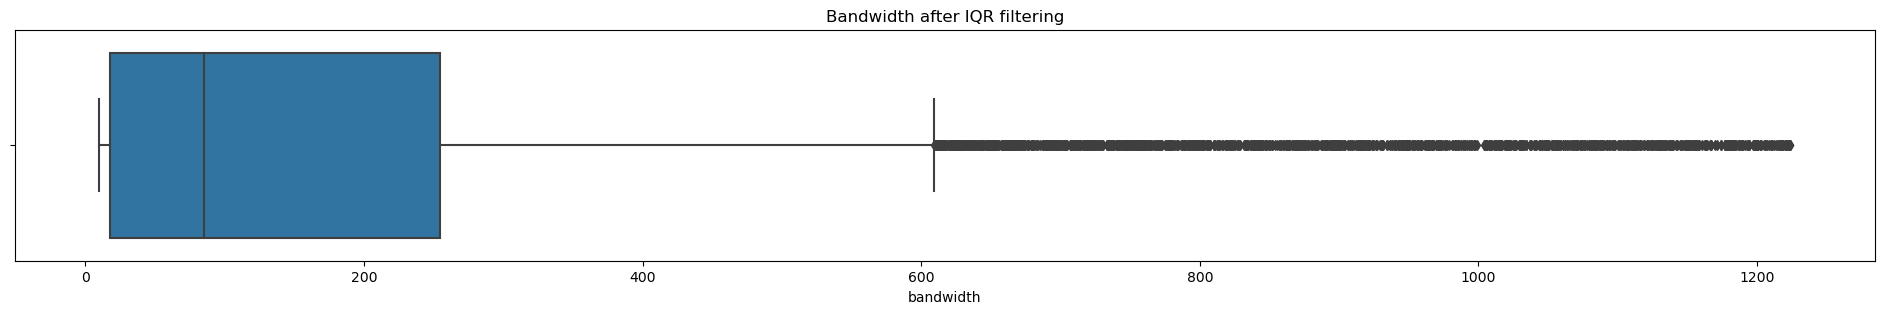

In [44]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Bandwidth after IQR filtering")
sns.boxplot(x=df_theta_posix_filtered_iqr.bandwidth)

# Prepare the model

### Import Pytorch

In [64]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch

import random

/home/eo080593/Software/miniconda3/envs/optuna-pytorch-1.12/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


### Load the pre-trained model

In [68]:
torch.cuda.set_device(1)

In [69]:
model = nn.Sequential(
    nn.Linear(97, 2048),
    nn.Dropout(p=config["dropout"]),
    nn.ReLU(),
    nn.Linear(2048, 512),
    nn.Dropout(p=config["dropout"]),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.Dropout(p=config["dropout"]),
    nn.ReLU(),
    nn.Linear(128, 1),
).to(device)

In [70]:
model.modules

<bound method Module.modules of Sequential(
  (0): Linear(in_features=97, out_features=2048, bias=True)
  (1): Dropout(p=0.05, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=2048, out_features=512, bias=True)
  (4): Dropout(p=0.05, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=128, bias=True)
  (7): Dropout(p=0.05, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=1, bias=True)
)>

In [71]:
print("Loading pretrained model...")

checkpoint = torch.load(MODEL_PATH, map_location=torch.device(device))
model.load_state_dict(checkpoint['model_state_dict'])
model_epoch = checkpoint['epoch']

print(f"Current epoch: {model_epoch}")

Loading pretrained model...
Current epoch: 599


### Reset the weights for the output layer for fine-tuning

In [73]:
output_layer = list(model.children())[-1]
output_layer.reset_parameters()

# Do the transfer learning

### Fix the seeds


In [77]:
random.seed(config.random_seed)
np.random.seed(config.random_seed)

torch.manual_seed(config.random_seed)
torch.cuda.manual_seed_all(config.random_seed)

# Set PyTorch to use deterministic algorithms if possible
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# Results in a crash during the call of F.linear
# torch.use_deterministic_algorithms(True)

## Split the data into the train/test pair

In [79]:
df_theta_posix = df_theta_posix.drop(['file'], axis=1)

### Separate bandwidth from input features

In [80]:
df_bandwidth = df_theta_posix.pop("bandwidth")

In [81]:
dataset_bandwidth_mean = df_bandwidth.mean()

### Split the dataset into train/test

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_theta_posix,
                                                    df_bandwidth,
                                                    test_size=0.2,
                                                    random_state=config.split_seed,
                                                    stratify=df_theta_posix["nprocs"] if config.stratified_split else None
                                                    )

In [84]:
len(X_test)

4184

In [85]:
len(X_train)

16732

In [86]:
test_dataset_mean = y_test.mean()

### Scale the input features

In [87]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [88]:
tensor_X_train = torch.Tensor(X_train_scaled).to(device)
tensor_y_train = torch.Tensor(y_train.values).view(-1, 1).to(device) #Transform to a 2D array to avoid shape mismatch (gives errors)

training_dataset = TensorDataset(tensor_X_train, tensor_y_train)
# The dataset is so small we can process it whole in one batch
training_dataloader = DataLoader(training_dataset, batch_size=config.batch_size, shuffle=config.shuffle)

In [89]:
# ### Scale the test set using the scaler fit on the training set
X_test_scaled = scaler.transform(X_test)

In [90]:
tensor_X_test = torch.Tensor(X_test_scaled).to(device)
tensor_y_test = torch.Tensor(y_test.values).view(-1, 1).to(device) #Transform to a 2D array to avoid shape mismatch (gives errors)

test_dataset = TensorDataset(tensor_X_test, tensor_y_test)
# The dataset is so small we can process it whole in one batch
test_dataloader = DataLoader(test_dataset, batch_size=config.batch_size)

In [91]:
len(training_dataloader)

9

In [92]:
len(test_dataloader)

3

### Setup loss, optimizer & learning rate scheduler

In [93]:
loss_fn = nn.SmoothL1Loss(reduction="sum").to(device)

In [95]:
optimizer = optim.Adamax(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)

In [96]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True)

In [97]:
model_epoch = 0
model.train()

Sequential(
  (0): Linear(in_features=97, out_features=2048, bias=True)
  (1): Dropout(p=0.05, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=2048, out_features=512, bias=True)
  (4): Dropout(p=0.05, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=128, bias=True)
  (7): Dropout(p=0.05, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=1, bias=True)
)

### Do the transfer learning

In [100]:
def train(epoch):
    size = len(training_dataloader)
    for batch, (X, y) in enumerate(training_dataloader):
        y_pred = model(X)
        
        # Divide the summed loss by the number of elements in the current batch to get the average loss
        loss = loss_fn(y, y_pred) / len(X)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()

    model.train()

In [101]:
def test():
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            pred = torch.abs(model(X))
            test_loss += loss_fn(pred, y).item() 

    # Divide the summed test loss by the number of elements in the whole test dataset to get the average loss
    test_loss /= len(test_dataloader.dataset)
    return test_loss

In [102]:
for epoch in range(model_epoch, config.epochs):

    train(epoch)
    test_loss = test()

    print(f"Epoch {epoch+1} loss: Avg loss/dataset mean: {test_loss/dataset_bandwidth_mean:>8f} \n")

    scheduler.step(test_loss)

    model_epoch = epoch

Epoch 1 loss: Avg loss/dataset mean: 0.956704 

Epoch 2 loss: Avg loss/dataset mean: 1.156718 

Epoch 3 loss: Avg loss/dataset mean: 1.367087 

Epoch 4 loss: Avg loss/dataset mean: 1.546229 

Epoch 5 loss: Avg loss/dataset mean: 1.587349 

Epoch 6 loss: Avg loss/dataset mean: 1.899721 

Epoch 7 loss: Avg loss/dataset mean: 2.244170 

Epoch 8 loss: Avg loss/dataset mean: 2.260552 

Epoch 9 loss: Avg loss/dataset mean: 2.136932 

Epoch 10 loss: Avg loss/dataset mean: 2.047352 

Epoch 11 loss: Avg loss/dataset mean: 1.989493 

Epoch 12 loss: Avg loss/dataset mean: 2.042626 

Epoch 00012: reducing learning rate of group 0 to 1.0000e-04.
Epoch 13 loss: Avg loss/dataset mean: 2.061255 

Epoch 14 loss: Avg loss/dataset mean: 2.072776 

Epoch 15 loss: Avg loss/dataset mean: 2.075764 

Epoch 16 loss: Avg loss/dataset mean: 2.096481 

Epoch 17 loss: Avg loss/dataset mean: 2.097269 

Epoch 18 loss: Avg loss/dataset mean: 2.101335 

Epoch 19 loss: Avg loss/dataset mean: 2.095704 

Epoch 20 loss: A

### Save the model

In [103]:
def build_model_name(config):

    model_name = f"{config.dataset}"
    model_name += f"_not_lower_than_{config.lower_threshold_for_removal}"
    model_name += f"_{config.output_clipping}"
    model_name += f"_{config.scaling}"
    model_name +=f"_{config.learning_rate}_lr"

    if(hasattr(config, "filter_zero_times") and config.filter_zero_times):
        model_name+= "_no_zero_times"

    if(hasattr(config, "outliers_removal_method")):
        model_name+= f"_{config.outliers_removal_method}"

    if(hasattr(config, "outliers_z_score_threshold")):
        model_name+= f"_{config.outliers_z_score_threshold}"

    if(hasattr(config, "stratified_split") and config.stratified_split):
        model_name+= "_stratsplit"

    if(hasattr(config, "nprocs_filter") and config.nprocs_filter):
        model_name+= f"_filtered_nprocs"

    model_name+=f"_{config.dropout}_dropout_pytorch_v{config.pytorch_version}"

    return model_name

In [ ]:
THETA_MODEL_DIR = "/home/thes1067/models/theta"
THETA_MODEL_NAME = build_model_name(config)
THETA_MODEL_PATH = Path(THETA_MODEL_DIR, THETA_MODEL_NAME)
THETA_MODEL_PATH

In [ ]:
torch.save({
    'epoch': model_epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict()
}, THETA_MODEL_PATH)